## Importing required modules

In [1]:
import pandas as pd
from bs4 import BeautifulSoup as bs
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import os
import warnings
warnings.filterwarnings("ignore")

## Change the current Directory

In [3]:
cwd=os.getcwd()
cancer_directory='Cancer_Research'
path = os.path.join(cwd, cancer_directory)
os.chdir(path)

## Read the scrapped data

In [4]:
Ethnic_data=pd.read_excel('Ethnic_Data_complete.xlsx',index_col=None)
Age_data=pd.read_excel('Age_Data_complete.xlsx',index_col=None)
Trend_data=pd.read_excel('Trend_Data_complete.xlsx',index_col=None)
Stage_data=pd.read_excel('stage_data_complete.xlsx',index_col=None)

## Clean the data

In [5]:
Ethnic_data['per 100000']= Ethnic_data['per 100000'].fillna('0')
Ethnic_data['per 100000']= Ethnic_data['per 100000'].replace(['Sex-specific cancer type'],'0')
Ethnic_data['per 100000']= Ethnic_data['per 100000'].replace(['Not Shown, <16 cases'],'0')
Ethnic_data['per 100000']= Ethnic_data['per 100000'].astype(float)
Ethnic_data['Ethnicity']=Ethnic_data['Ethnicity'].replace('Non-Hispanic American Indian/Alaska Native','N-Hispanic AI/AN')
Ethnic_data['Ethnicity']=Ethnic_data['Ethnicity'].replace('Non-Hispanic Asian/Pacific Islander','N-Hispanic A/P Islander')

Age_data['Percent of New Cases/ Deaths']= Age_data['Percent of New Cases/ Deaths'].replace({'%':''}, regex=True)
Age_data['Percent of New Cases/ Deaths']= Age_data['Percent of New Cases/ Deaths'].astype(float)

Trend_data['Rate of New Cases — SEER 8 (Observed)']=Trend_data['Rate of New Cases — SEER 8 (Observed)'].replace(['-'],0)
Trend_data['Rate of New Cases — SEER 8 (Modeled)']=Trend_data['Rate of New Cases — SEER 8 (Modeled)'].replace(['-'],0)
Trend_data['Rate of New Cases — SEER 12(Observed)']=Trend_data['Rate of New Cases — SEER 12(Observed)'].replace(['-'],0)
Trend_data['Rate of New Cases — SEER 12(Modeled)']=Trend_data['Rate of New Cases — SEER 12(Modeled)'].replace(['-'],0)
Trend_data['Death Rate — U.S.(Observed)']=Trend_data['Death Rate — U.S.(Observed)'].replace(['-'],0)
Trend_data['Death Rate — U.S.(Modeled)']=Trend_data['Death Rate — U.S.(Modeled)'].replace(['-'],0)
Trend_data['5-Year Relative Survival — SEER 8(Observed)']=Trend_data['5-Year Relative Survival — SEER 8(Observed)'].replace(['-'],0)
Trend_data['5-Year Relative Survival — SEER 8(Modeled)']=Trend_data['5-Year Relative Survival — SEER 8(Modeled)'].replace(['-'],0)

Trend_data['5-Year Relative Survival — SEER 8(Observed)']=Trend_data['5-Year Relative Survival — SEER 8(Observed)'].replace({'%':''}, regex=True)
Trend_data['5-Year Relative Survival — SEER 8(Modeled)']=Trend_data['5-Year Relative Survival — SEER 8(Modeled)'].replace({'%':''}, regex=True)

Trend_data['Rate of New Cases — SEER 8 (Observed)']=Trend_data['Rate of New Cases — SEER 8 (Observed)'].astype(float)
Trend_data['Rate of New Cases — SEER 8 (Modeled)']=Trend_data['Rate of New Cases — SEER 8 (Modeled)'].astype(float)
Trend_data['Rate of New Cases — SEER 12(Observed)']=Trend_data['Rate of New Cases — SEER 12(Observed)'].astype(float)
Trend_data['Rate of New Cases — SEER 12(Modeled)']=Trend_data['Rate of New Cases — SEER 12(Modeled)'].astype(float)
Trend_data['Death Rate — U.S.(Observed)']=Trend_data['Death Rate — U.S.(Observed)'].astype(float)
Trend_data['Death Rate — U.S.(Modeled)']=Trend_data['Death Rate — U.S.(Modeled)'].astype(float)
Trend_data['5-Year Relative Survival — SEER 8(Observed)']=Trend_data['5-Year Relative Survival — SEER 8(Observed)'].astype(float)
Trend_data['5-Year Relative Survival — SEER 8(Modeled)']=Trend_data['5-Year Relative Survival — SEER 8(Modeled)'].astype(float)

Stage_data['Percent of Cases']= Stage_data['Percent of Cases'].replace({'%':''}, regex=True)
Stage_data['5-Year Relative Survival']= Stage_data['5-Year Relative Survival'].replace({'%':''}, regex=True)
Stage_data['Percent of Cases']= Stage_data['Percent of Cases'].astype(float)
Stage_data['5-Year Relative Survival']= Stage_data['5-Year Relative Survival'].astype(float)

Race_Ethnicity=['All Races','Non-Hispanic White','Non-Hispanic Black','N-Hispanic AI/AN*','N-Hispanic A/P Islander**','Hispanic']


## Now that the data is clean we will derive insights from the cleaned data

### How does different Cancer affect different types of people?

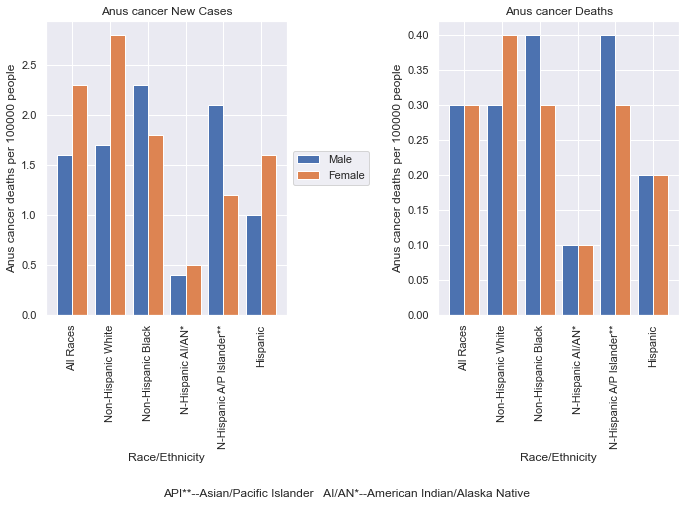

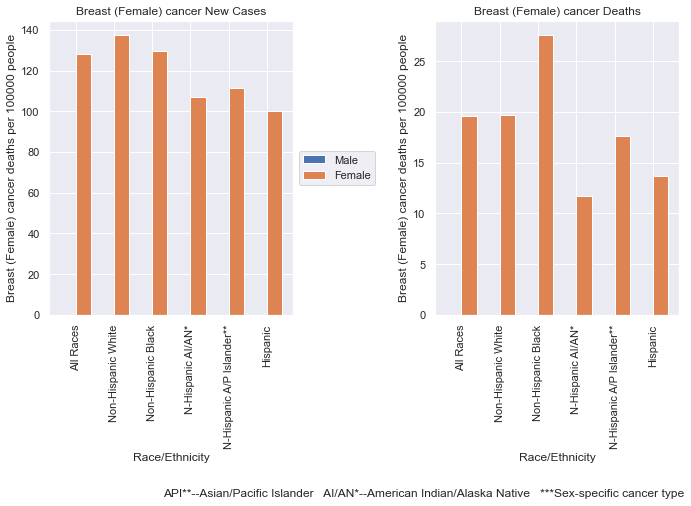

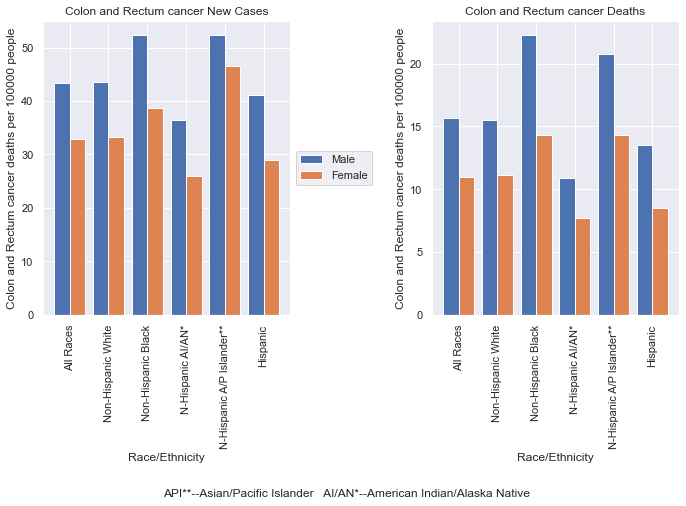

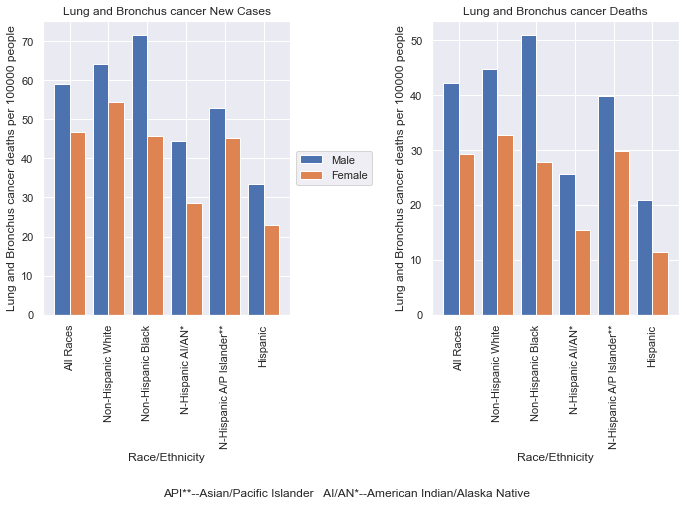

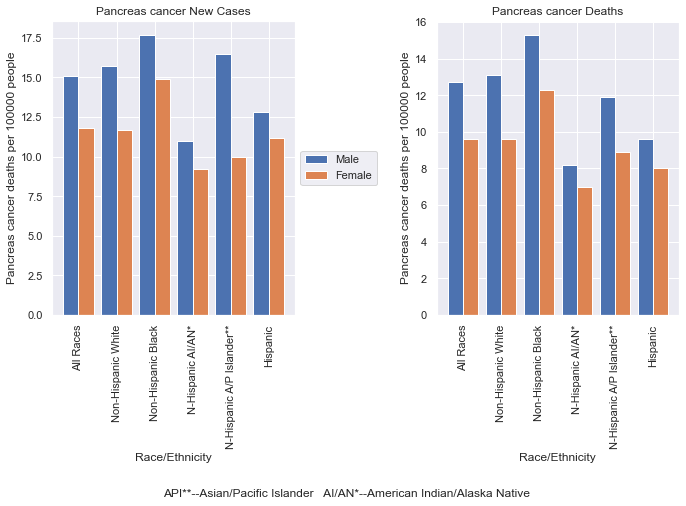

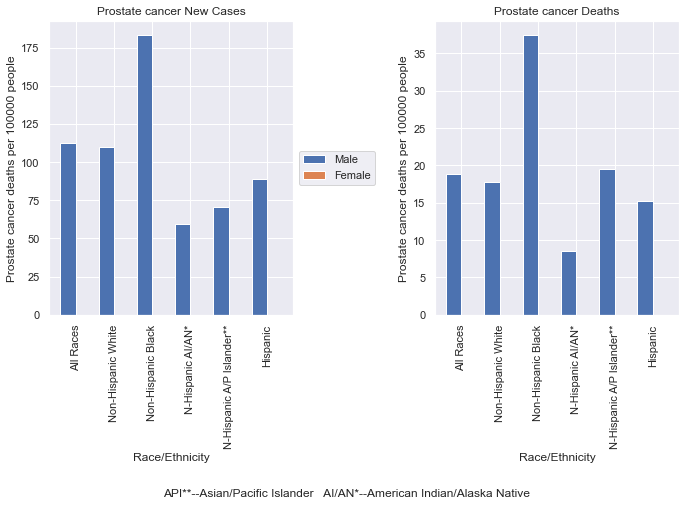

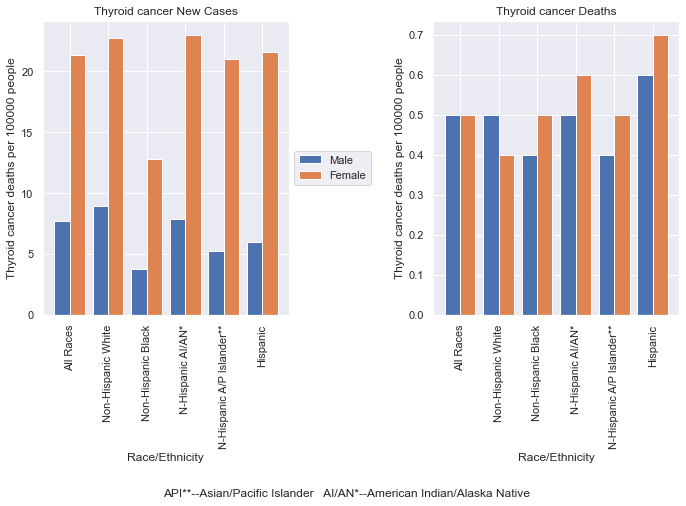

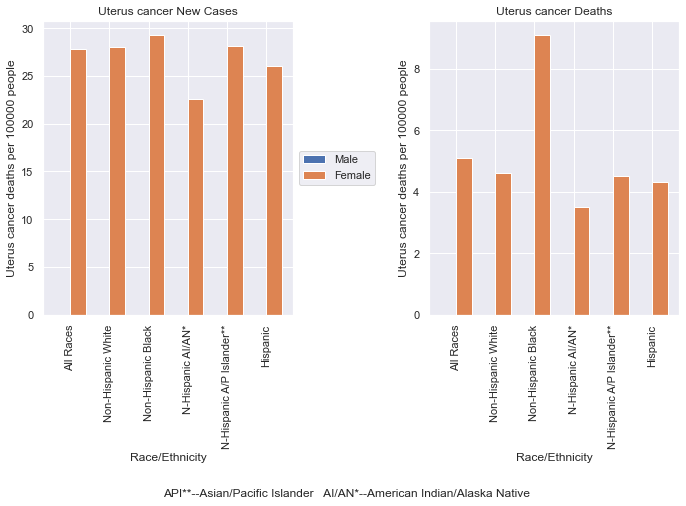

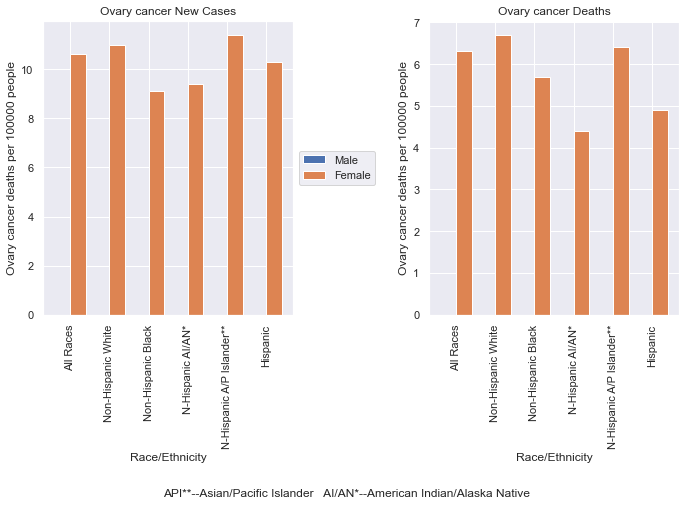

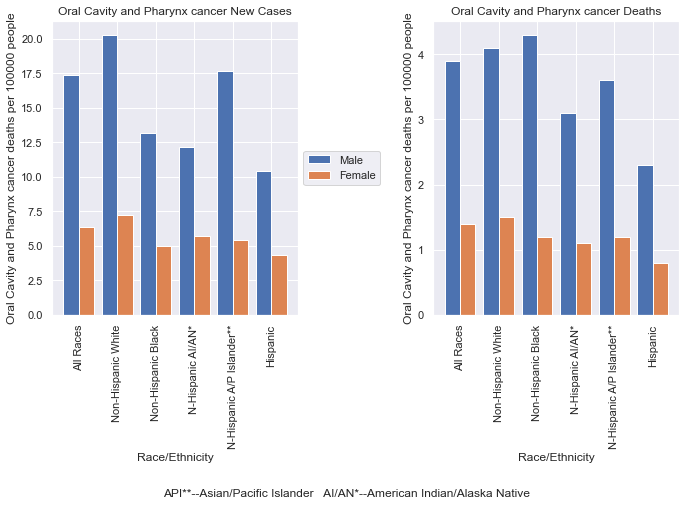

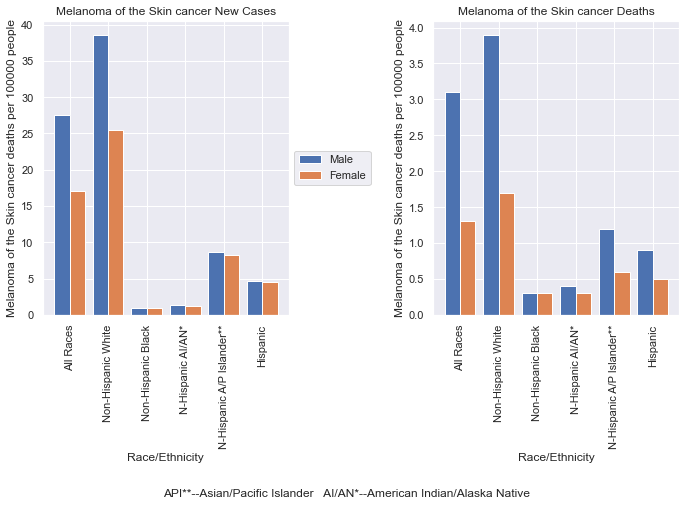

In [6]:
Cancer_Type=['Anus','Breast (Female)','Colon and Rectum','Lung and Bronchus','Pancreas','Prostate','Thyroid','Uterus','Ovary','Oral Cavity and Pharynx','Melanoma of the Skin']

for cancer in Cancer_Type:
    Ethnic_data_Male=Ethnic_data[(Ethnic_data['New Cases / Deaths']=="New Cases") & (Ethnic_data['SEX']=='Males')
            &(Ethnic_data['Cancer Type']==cancer)]['per 100000']
    Ethnic_data_Female=Ethnic_data[(Ethnic_data['New Cases / Deaths']=="New Cases") & (Ethnic_data['SEX']=='Females')
            &(Ethnic_data['Cancer Type']==cancer)]['per 100000']
    X_axis = np.arange(len(Race_Ethnicity))
    sns.set(rc={'figure.figsize':(10,7)})
    ax=plt.subplot(1, 2, 1)
    plt.bar(X_axis-0.2,Ethnic_data_Male,0.4,label='Male')
    plt.bar(X_axis+0.2,Ethnic_data_Female,0.4,label='Female')
    plt.xticks(X_axis,Race_Ethnicity, rotation=90)
    plt.title(cancer+' cancer New Cases')
    plt.ylabel(cancer+' cancer deaths per 100000 people')
    plt.xlabel('Race/Ethnicity')
    plt.legend()
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    #plt.show()
    
    Ethnic_data_Male=Ethnic_data[(Ethnic_data['New Cases / Deaths']=="Deaths") & (Ethnic_data['SEX']=='Males') 
                     &(Ethnic_data['Cancer Type']==cancer)]['per 100000']
    Ethnic_data_Female=Ethnic_data[(Ethnic_data['New Cases / Deaths']=="Deaths") & (Ethnic_data['SEX']=='Females') 
                         &(Ethnic_data['Cancer Type']==cancer)]['per 100000']
    X_axis = np.arange(len(Race_Ethnicity))
    ax=plt.subplot(1, 2, 2)
    plt.bar(X_axis-0.2,Ethnic_data_Male,0.4,label='Male')
    plt.bar(X_axis+0.2,Ethnic_data_Female,0.4,label='Female')
    plt.xticks(X_axis,Race_Ethnicity, rotation=90)
    plt.title(cancer+' cancer Deaths')
    plt.ylabel(cancer+' cancer deaths per 100000 people')
    plt.xlabel('Race/Ethnicity')
    #plt.legend()
    if cancer =='Breast (Female)' or cancer=='Cervix Uteri':
        plt.figtext(0.25,-.02,'API**--Asian/Pacific Islander   AI/AN*--American Indian/Alaska Native   ***Sex-specific cancer type')
    else:
        plt.figtext(0.25,-.02,'API**--Asian/Pacific Islander   AI/AN*--American Indian/Alaska Native')
    #plt.show()
    plt.tight_layout(2)
    plt.show()

### Show how the number of cases/deaths has changed over the year for different cancer types

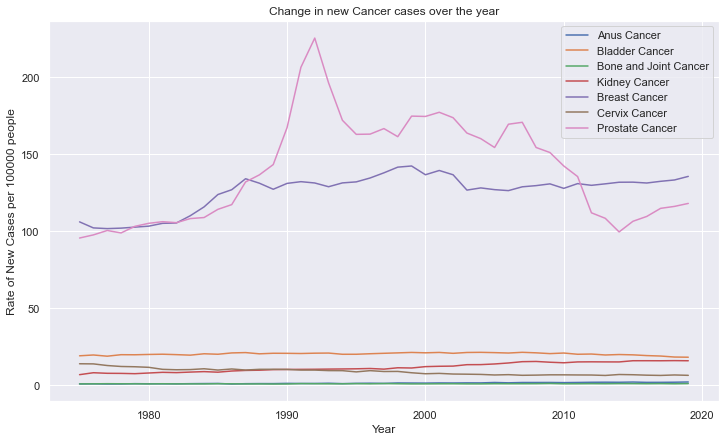

In [7]:
Anus_cancer_Cases=Trend_data[Trend_data['Cancer Type'] == 'Anus']['Rate of New Cases — SEER 8 (Observed)'][:-1]
Bladder_cancer_Cases=Trend_data[Trend_data['Cancer Type'] == 'Bladder']['Rate of New Cases — SEER 8 (Observed)'][:-1]
Bone_and_Joint_cancer_Cases=Trend_data[Trend_data['Cancer Type'] == 'Bone and Joint']['Rate of New Cases — SEER 8 (Observed)'][:-1]
Kidney_cancer_Cases=Trend_data[Trend_data['Cancer Type'] == 'Kidney and Renal Pelvis']['Rate of New Cases — SEER 8 (Observed)'][:-1]
Breast_cancer_Cases=Trend_data[Trend_data['Cancer Type'] == 'Breast (Female)']['Rate of New Cases — SEER 8 (Observed)'][:-1]
Cervix_Cases=Trend_data[Trend_data['Cancer Type'] == 'Cervix Uteri']['Rate of New Cases — SEER 8 (Observed)'][:-1]
Prostate_Cases=Trend_data[Trend_data['Cancer Type'] == 'Prostate']['Rate of New Cases — SEER 8 (Observed)'][:-1]

year=Trend_data['Year'][:-1]
sns.set(rc={'figure.figsize':(12,7)})
sns.lineplot(year,Anus_cancer_Cases)
sns.lineplot(year,Bladder_cancer_Cases)
sns.lineplot(year,Bone_and_Joint_cancer_Cases)
sns.lineplot(year,Kidney_cancer_Cases)
sns.lineplot(year,Breast_cancer_Cases)
sns.lineplot(year,Cervix_Cases)
sns.lineplot(year,Prostate_Cases)
plt.legend(labels=['Anus Cancer','Bladder Cancer','Bone and Joint Cancer','Kidney Cancer','Breast Cancer','Cervix Cancer','Prostate Cancer'])
plt.ylabel('Rate of New Cases per 100000 people')
plt.xlabel('Year')
plt.title('Change in new Cancer cases over the year')
plt.show()

From the above graph it is quite evident that there is an uptick in the number of people being diagnosed with <b>Breast cancer</b>.
<b>Prostate cancer</b> show a huge uptick in the number of people diagnosed during the early 1990s. Since then there has been a significant decrease in it.
Other than this there is not much changes in the number of cancer cases over the year.

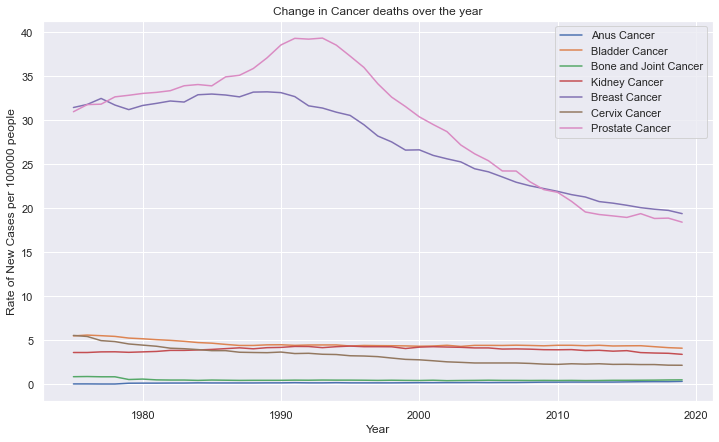

In [22]:
Anus_cancer_Cases=Trend_data[Trend_data['Cancer Type'] == 'Anus']['Death Rate — U.S.(Observed)'][:-1]
Bladder_cancer_Cases=Trend_data[Trend_data['Cancer Type'] == 'Bladder']['Death Rate — U.S.(Observed)'][:-1]
Bone_and_Joint_cancer_Cases=Trend_data[Trend_data['Cancer Type'] == 'Bone and Joint']['Death Rate — U.S.(Observed)'][:-1]
Kidney_cancer_Cases=Trend_data[Trend_data['Cancer Type'] == 'Kidney and Renal Pelvis']['Death Rate — U.S.(Observed)'][:-1]
Breast_cancer_Cases=Trend_data[Trend_data['Cancer Type'] == 'Breast (Female)']['Death Rate — U.S.(Observed)'][:-1]
Cervix_Cases=Trend_data[Trend_data['Cancer Type'] == 'Cervix Uteri']['Death Rate — U.S.(Observed)'][:-1]
Prostate_Cases=Trend_data[Trend_data['Cancer Type'] == 'Prostate']['Death Rate — U.S.(Observed)'][:-1]

year=Trend_data['Year'][:-1]
sns.set(rc={'figure.figsize':(12,7)})
sns.lineplot(year,Anus_cancer_Cases)
sns.lineplot(year,Bladder_cancer_Cases)
sns.lineplot(year,Bone_and_Joint_cancer_Cases)
sns.lineplot(year,Kidney_cancer_Cases)
sns.lineplot(year,Breast_cancer_Cases)
sns.lineplot(year,Cervix_Cases)
sns.lineplot(year,Prostate_Cases)
plt.legend(labels=['Anus Cancer','Bladder Cancer','Bone and Joint Cancer','Kidney Cancer','Breast Cancer','Cervix Cancer','Prostate Cancer'])
plt.ylabel('Rate of New Cases per 100000 people')
plt.xlabel('Year')
plt.title('Change in Cancer deaths over the year')
plt.show()

From the above graph we can see that there is a substantial decrease in the number of people dying from <b>Breast and Prostate cancer</b> over the years.
There is a reduction across the board for deaths from cancer.

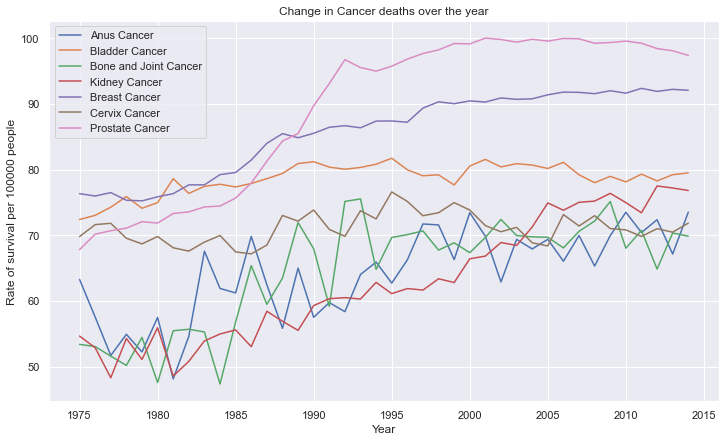

In [27]:
Anus_cancer_Cases=Trend_data[Trend_data['Cancer Type'] == 'Anus']['5-Year Relative Survival — SEER 8(Observed)'][:-6]
Bladder_cancer_Cases=Trend_data[Trend_data['Cancer Type'] == 'Bladder']['5-Year Relative Survival — SEER 8(Observed)'][:-6]
Bone_and_Joint_cancer_Cases=Trend_data[Trend_data['Cancer Type'] == 'Bone and Joint']['5-Year Relative Survival — SEER 8(Observed)'][:-6]
Kidney_cancer_Cases=Trend_data[Trend_data['Cancer Type'] == 'Kidney and Renal Pelvis']['5-Year Relative Survival — SEER 8(Observed)'][:-6]
Breast_cancer_Cases=Trend_data[Trend_data['Cancer Type'] == 'Breast (Female)']['5-Year Relative Survival — SEER 8(Observed)'][:-6]
Cervix_Cases=Trend_data[Trend_data['Cancer Type'] == 'Cervix Uteri']['5-Year Relative Survival — SEER 8(Observed)'][:-6]
Prostate_Cases=Trend_data[Trend_data['Cancer Type'] == 'Prostate']['5-Year Relative Survival — SEER 8(Observed)'][:-6]

year=Trend_data['Year'][:-6]
sns.set(rc={'figure.figsize':(12,7)})
sns.lineplot(year,Anus_cancer_Cases)
sns.lineplot(year,Bladder_cancer_Cases)
sns.lineplot(year,Bone_and_Joint_cancer_Cases)
sns.lineplot(year,Kidney_cancer_Cases)
sns.lineplot(year,Breast_cancer_Cases)
sns.lineplot(year,Cervix_Cases)
sns.lineplot(year,Prostate_Cases)
plt.legend(labels=['Anus Cancer','Bladder Cancer','Bone and Joint Cancer','Kidney Cancer','Breast Cancer','Cervix Cancer','Prostate Cancer'])
plt.ylabel('Rate of survival per 100000 people')
plt.xlabel('Year')
plt.title('Change in Cancer deaths over the year')
plt.show()

1.From the graph above we can clearly see that cancer treatment has improved over the years and more and more people are surviving it.
</br>
2.<b>Breast and Prostate cancer</b> treatment has improved the most, with the percentage of people surving increasing from <b>68%</b> to <b>98%</b> for <b>Prostate cancer</b> and <b>76%</b> to <b>92%</b> for <b>Breast cancer</b>.

### Which Cancer Type affects Black people the most?

In [14]:
Race_Data_Black=Ethnic_data[(Ethnic_data['Ethnicity']=='Non-Hispanic Black') & (Ethnic_data['New Cases / Deaths']=='New Cases') & (Ethnic_data['SEX']=='Males')]
print(Race_Data_Black.sort_values(by=['per 100000'],ascending=[False]).head(1)[['Cancer Type','New Cases / Deaths','per 100000','SEX']].to_string(index=False))
print('\n')
Race_Data_Black=Ethnic_data[(Ethnic_data['Ethnicity']=='Non-Hispanic Black') & (Ethnic_data['New Cases / Deaths']=='New Cases') & (Ethnic_data['SEX']=='Females')]
print(Race_Data_Black.sort_values(by=['per 100000'],ascending=[False]).head(1)[['Cancer Type','New Cases / Deaths','per 100000','SEX']].to_string(index=False))
print('\n')
Race_Data_Black=Ethnic_data[(Ethnic_data['Ethnicity']=='Non-Hispanic Black') & (Ethnic_data['New Cases / Deaths']=='Deaths') & (Ethnic_data['SEX']=='Males')]
print(Race_Data_Black.sort_values(by=['per 100000'],ascending=[False]).head(1)[['Cancer Type','New Cases / Deaths','per 100000','SEX']].to_string(index=False))
print('\n')
Race_Data_Black=Ethnic_data[(Ethnic_data['Ethnicity']=='Non-Hispanic Black') & (Ethnic_data['New Cases / Deaths']=='Deaths') & (Ethnic_data['SEX']=='Females')]
print(Race_Data_Black.sort_values(by=['per 100000'],ascending=[False]).head(1)[['Cancer Type','New Cases / Deaths','per 100000','SEX']].to_string(index=False))

print('* All values are per 100000 people.')

Cancer Type New Cases / Deaths  per 100000   SEX
   Prostate          New Cases       183.4 Males


    Cancer Type New Cases / Deaths  per 100000     SEX
Breast (Female)          New Cases       129.6 Females


      Cancer Type New Cases / Deaths  per 100000   SEX
Lung and Bronchus             Deaths        51.0 Males


      Cancer Type New Cases / Deaths  per 100000     SEX
Lung and Bronchus             Deaths        27.8 Females
* All values are per 100000 people.


### Which cancer type has the highest mortality rate?

In [16]:
Five_data_mortality=Trend_data[(Trend_data['Cancer Type']!='All Cancers')][['Cancer Type','Death Rate — U.S.(Observed)']]
print(Five_data_mortality.sort_values(by=['Death Rate — U.S.(Observed)'],ascending=False).head(1)[['Cancer Type','Death Rate — U.S.(Observed)']].to_string(index=False))
print('*The values are in percentage(%).')

      Cancer Type  Death Rate — U.S.(Observed)
Lung and Bronchus                        59.13
*The values are in percentage(%).


### What is the average rate of the cases and deaths for each cancer type over the years?

In [19]:
Five_data_average=Trend_data.groupby(['Cancer Type']).agg(average_new_cases_Seer_8=('Rate of New Cases — SEER 8 (Observed)','mean'),
                                                         average_new_cases_Seer_12=('Rate of New Cases — SEER 12(Observed)','mean'),
                                                         average_deaths=('Death Rate — U.S.(Observed)','mean'),
                                                         five_year_survival_average_Seer_8=('5-Year Relative Survival — SEER 8(Observed)','mean'))
print('* All values are per 100000 people.')
print('** five_year_survival_average_Seer_8 is in percentage')
Five_data_average.sort_values(by=['average_new_cases_Seer_8','average_new_cases_Seer_12','average_deaths','five_year_survival_average_Seer_8'],ascending=[False,False,False,False])

* All values are per 100000 people.
** five_year_survival_average_Seer_8 is in percentage


,average_new_cases_Seer_8,average_new_cases_Seer_12,average_deaths,five_year_survival_average_Seer_8
Cancer Type,,,,
Prostate,136.508478,90.321522,29.256739,77.610870
Breast (Female),123.140217,78.586739,27.274565,74.555435
Lung and Bronchus,57.048478,33.040652,50.252391,13.393261
Colon and Rectum,51.143043,27.881739,21.091739,53.597174
Uterus,25.856087,15.397174,4.530652,73.229565
Bladder,19.817391,11.815000,4.565435,68.373043
Melanoma of the Skin,17.891522,12.049130,2.541522,78.018478
Ovary,13.629130,7.868913,8.537609,37.218261
Leukemia,13.116304,8.155217,7.463261,43.455000


### Which cancer should be given priority for research to reduce its impact on society?

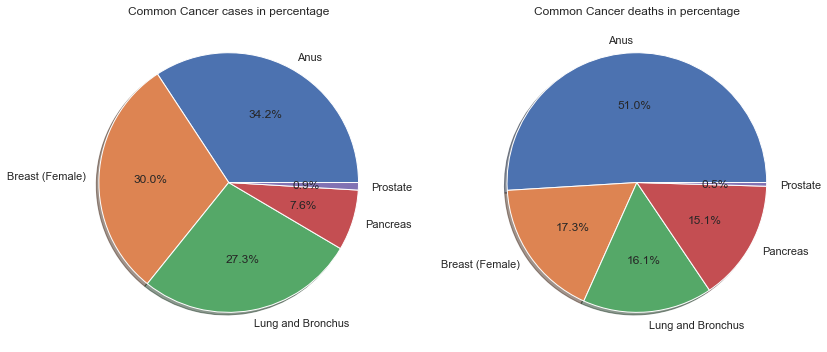

In [93]:
Type_of_Cancer=['Anus','Breast (Female)','Lung and Bronchus','Pancreas','Prostate']

Ethnic_data_filtered= Ethnic_data[(Ethnic_data['Cancer Type']=='Anus') | (Ethnic_data['Cancer Type']=='Breast (Female)') | (Ethnic_data['Cancer Type']=='Lung and Bronchus') | (Ethnic_data['Cancer Type']=='Pancreas') | (Ethnic_data['Cancer Type']=='Prostate')]

Common_cancer_Cases=Ethnic_data_filtered[Ethnic_data_filtered['New Cases / Deaths']=='New Cases'].groupby(['Cancer Type','New Cases / Deaths']).agg(total=('per 100000','sum')).sort_values(by=['total'],ascending=[False])
Common_cancer_Deaths=Ethnic_data_filtered[Ethnic_data_filtered['New Cases / Deaths']=='Deaths'].groupby(['Cancer Type','New Cases / Deaths']).agg(total=('per 100000','sum')).sort_values(by=['total'],ascending=[False])

cancer_cases_total=Common_cancer_Cases.agg(total=('total','sum'))

ax=plt.subplot(1,2,1)
sns.set(rc={'figure.figsize':(10,7)})
plt.title('Common Cancer cases in percentage')
total=sum(Common_cancer_Cases['total'])
plt.pie(Common_cancer_Cases['total'],labels=Type_of_Cancer,autopct=lambda p: '{:.1f}%'.format(p * 100 / 100), shadow=True)
ax=plt.subplot(1,2,2)
sns.set(rc={'figure.figsize':(10,7)})
plt.title('Common Cancer deaths in percentage')
total=sum(Common_cancer_Deaths['total'])
plt.pie(Common_cancer_Deaths['total'],labels=Type_of_Cancer,autopct=lambda p: '{:.1f}%'.format(p * 100 / 100), shadow=True)
#plt.show()
plt.tight_layout(2)
plt.show()

### Show a relation between a person's age and various types of cancer?

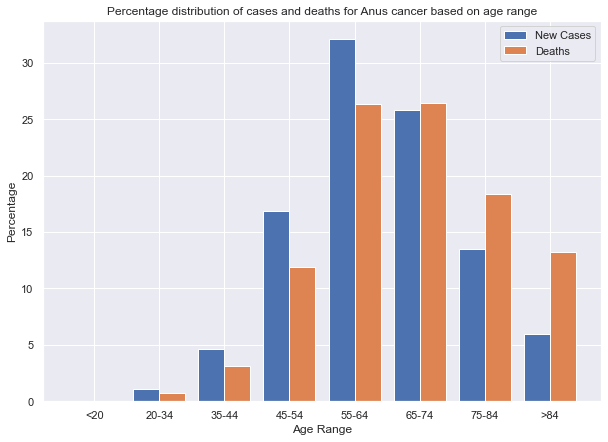

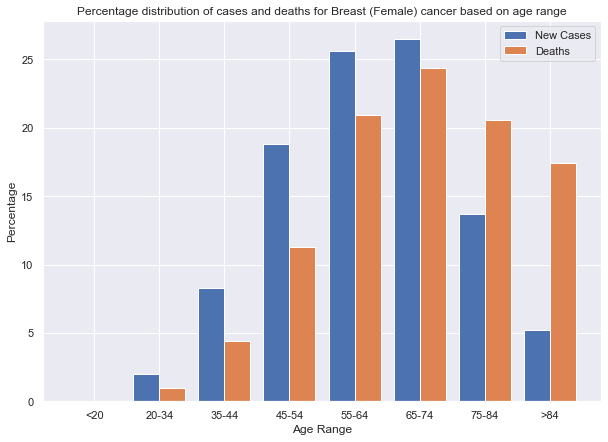

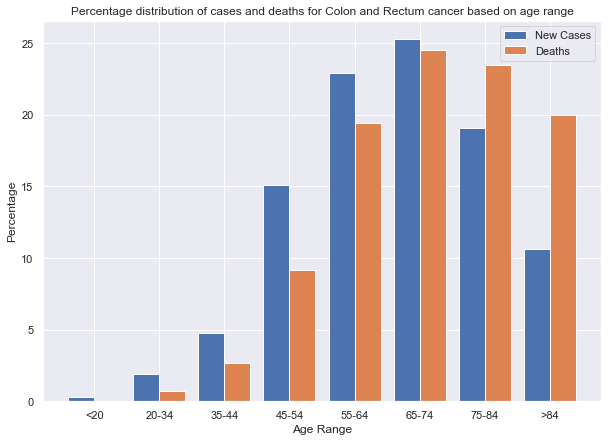

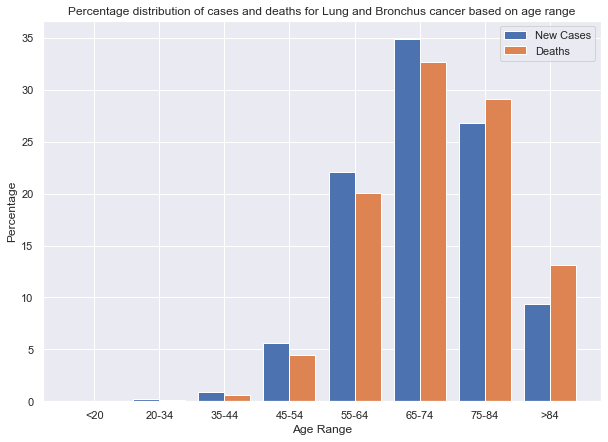

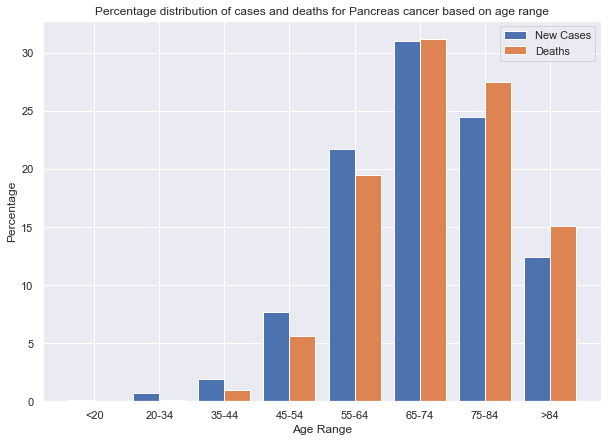

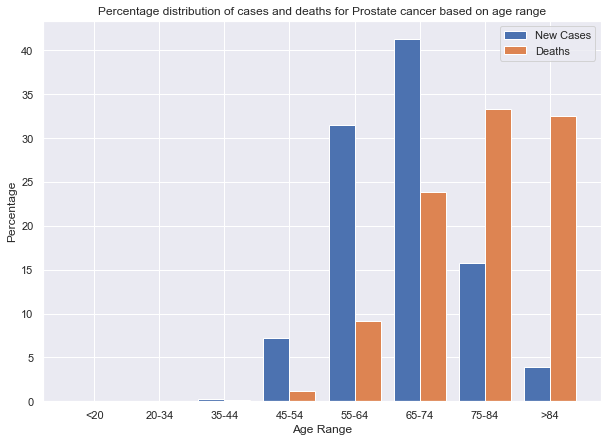

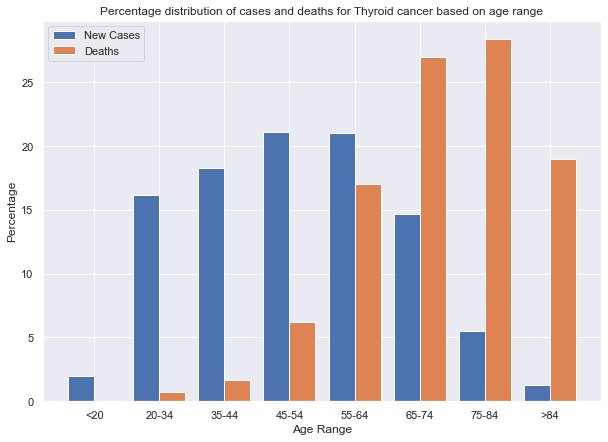

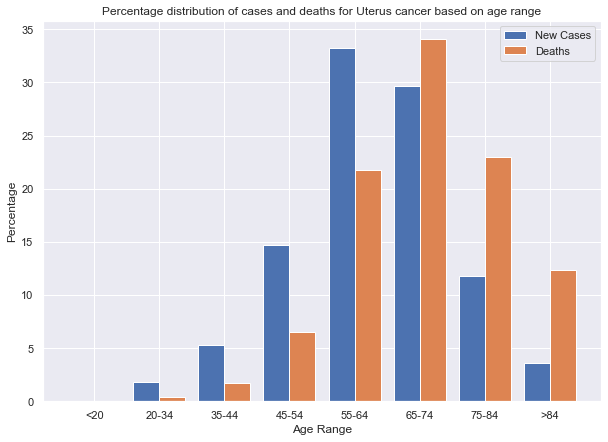

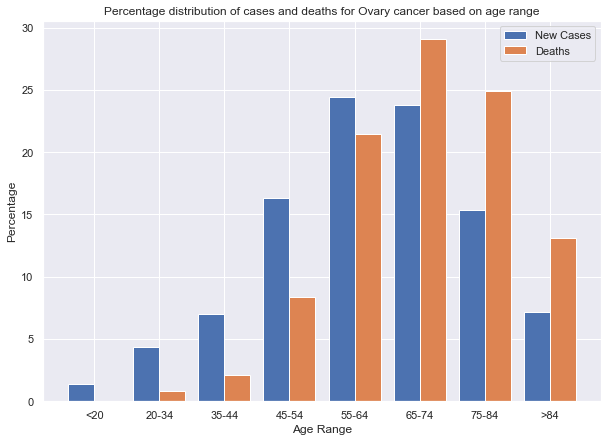

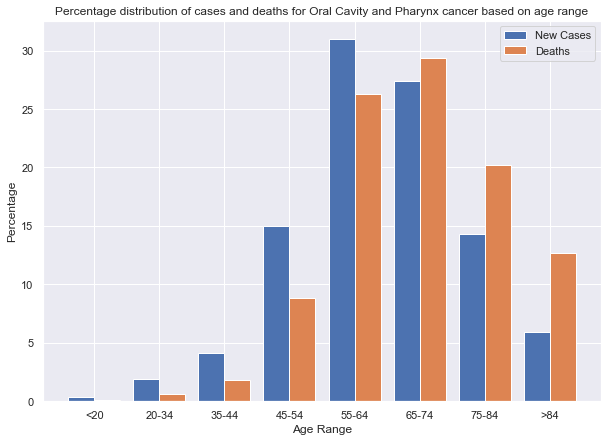

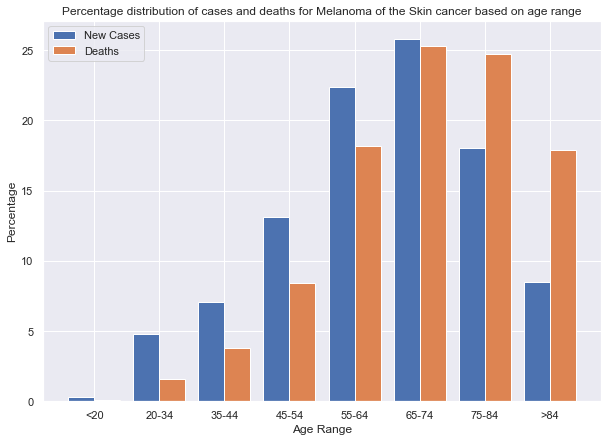

In [90]:
Cancer_Type=['Anus','Breast (Female)','Colon and Rectum','Lung and Bronchus','Pancreas','Prostate','Thyroid','Uterus','Ovary','Oral Cavity and Pharynx','Melanoma of the Skin']
for cancer in Cancer_Type:
    Age_data_cases=Age_data[(Age_data['Cancer Type']==cancer) & (Age_data['Outcome']=='New Cases')]['Percent of New Cases/ Deaths']
    Age_data_death=Age_data[(Age_data['Cancer Type']==cancer) & (Age_data['Outcome']=='Deaths')]['Percent of New Cases/ Deaths']
    Age_range=['<20','20-34','35-44','45-54','55-64','65-74','75-84','>84']
    X_axis = np.arange(len(Age_range))
    ax=plt.subplot(1, 1, 1)
    plt.bar(X_axis-0.2,Age_data_cases,0.4,label='New Cases')
    plt.bar(X_axis+0.2,Age_data_death,0.4,label='Deaths')
    plt.xticks(X_axis,Age_range)
    plt.title('Percentage distribution of cases and deaths for '+cancer+' cancer based on age range')
    plt.ylabel('Percentage')
    plt.xlabel('Age Range')
    plt.legend()
    plt.show()

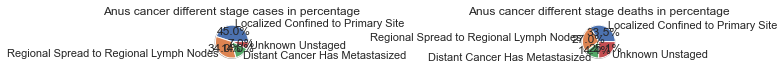

-----------------------------------------------------------------------------------------------------------------


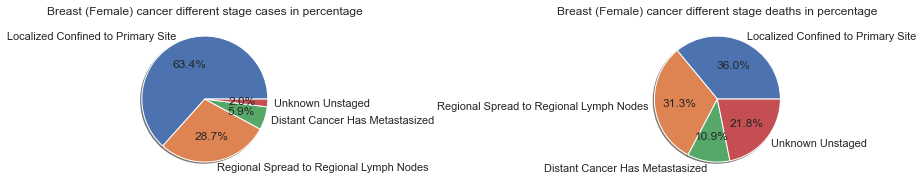

-----------------------------------------------------------------------------------------------------------------


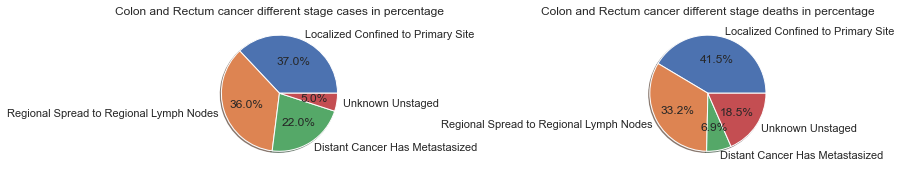

-----------------------------------------------------------------------------------------------------------------


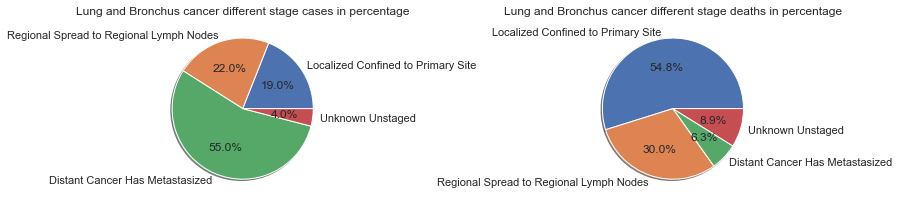

-----------------------------------------------------------------------------------------------------------------


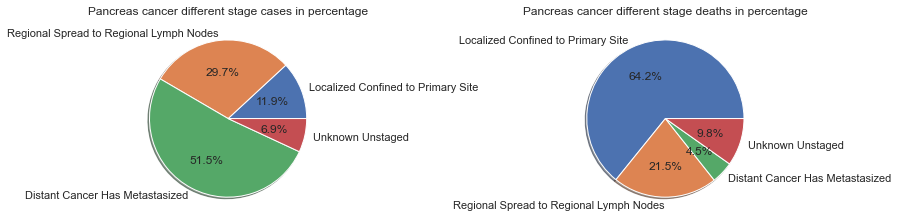

-----------------------------------------------------------------------------------------------------------------


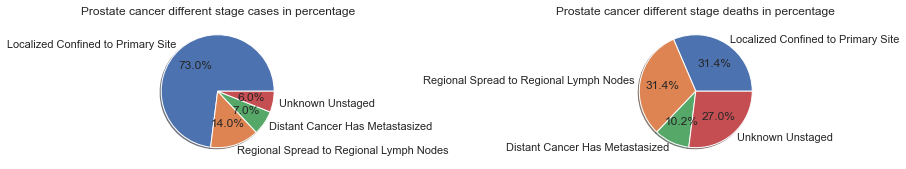

-----------------------------------------------------------------------------------------------------------------


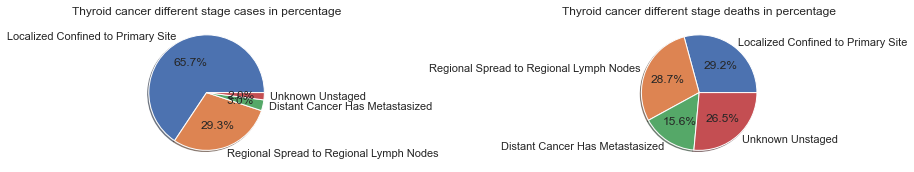

-----------------------------------------------------------------------------------------------------------------


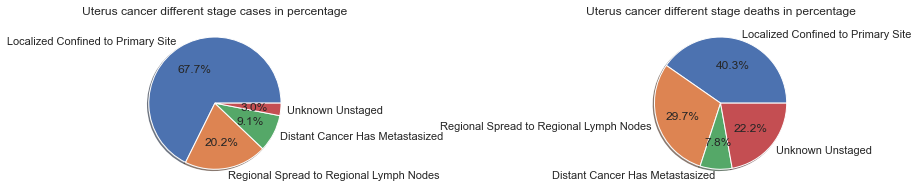

-----------------------------------------------------------------------------------------------------------------


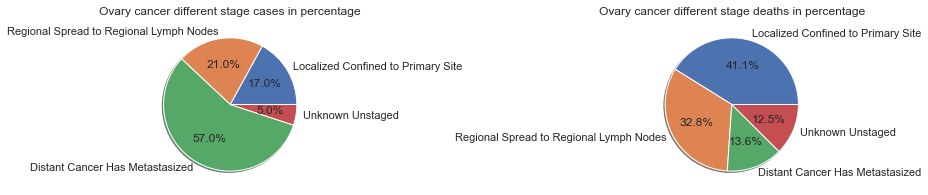

-----------------------------------------------------------------------------------------------------------------


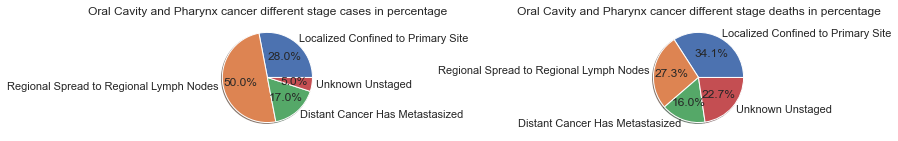

-----------------------------------------------------------------------------------------------------------------


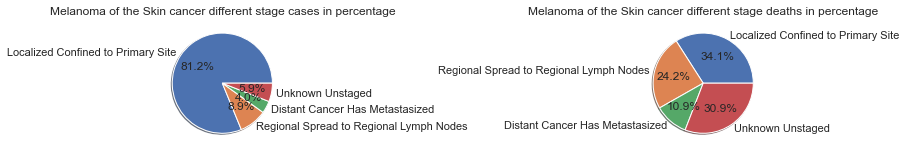

-----------------------------------------------------------------------------------------------------------------


In [92]:
Cancer_Type=['Anus','Breast (Female)','Colon and Rectum','Lung and Bronchus','Pancreas','Prostate','Thyroid','Uterus','Ovary','Oral Cavity and Pharynx','Melanoma of the Skin']
for cancer in Cancer_Type:
    Stage_data_cases = Stage_data[(Stage_data['Cancer Type']==cancer)]['Percent of Cases']
    Stage_data_survival = Stage_data[(Stage_data['Cancer Type']==cancer)]['5-Year Relative Survival']
    Stage_name = Stage_data[(Stage_data['Cancer Type']==cancer)]['Stage']
    ax=plt.subplot(1,2,1)
    sns.set(rc={'figure.figsize':(12,7)})
    plt.title(cancer+' cancer different stage cases in percentage')
    total=sum(Stage_data_cases)
    plt.pie(Stage_data_cases,labels=Stage_name,autopct=lambda p: '{:.1f}%'.format(p * 100 / 100), shadow=True)
    ax=plt.subplot(1,2,2)
    sns.set(rc={'figure.figsize':(12,7)})
    plt.title(cancer+' cancer different stage deaths in percentage')
    total=sum(Stage_data_survival)
    plt.pie(Stage_data_survival,labels=Stage_name,autopct=lambda p: '{:.1f}%'.format(p * 100 / 100), shadow=True)
    #plt.show()
    plt.tight_layout(2)
    plt.show()
    print('-----------------------------------------------------------------------------------------------------------------')
    